## Анализ данных о кредитовании физических лиц 
на синтетических данных

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
x= pd.read_csv('Data/loan_data.csv')
x

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


### Разведочный анализ данных

### Описание переменных: экономическая интерпретация


 person_age: Возраст заемщика (Числовой дискретный). Практически может указывать на финансовую зрелость и опыт заемщика. Измеряется в годах. 

person_gender: Пол заемщика (Категориальный номинальный бинарный). Может влиять на доступ к кредитам в зависимости от социально-культурных факторов. Измеряется как "мужчина" или "женщина". 

person_education: Уровень образования заемщика (Категориальный номинальный). Высшее образование может быть связано с более высоким доходом и лучшими шансами на получение кредита. 

person_income: Годовой доход заемщика (Числовой непрерывный). Важный фактор при оценке способности заемщика погашать кредит. Измеряется в денежном эквиваленте. 

person_emp_exp: Опыт работы заемщика (Числовой дискретный). Чем больше лет опыта работы, тем выше вероятность стабильного дохода. 

person_home_ownership: Статус владения жильем (Категориальный номинальный). Может указывать на финансовую стабильность заемщика. 

loan_amnt: Сумма запрашиваемого кредита (Числовой непрерывный). Определяет размер риска для кредитора. 

loan_intent: Цель кредита (Категориальный номинальный). Разные цели могут иметь разные уровни риска.

loan_in_trate: Процентная ставка по кредиту (Числовой непрерывный). Влияет на общую стоимость кредита для заемщика. 

loan_percent_income: Сумма кредита как процент от годового дохода (Числовой непрерывный). Позволяет оценить нагрузку кредита на финансовое состояние заемщика.  

cb_person_cred_hist_length: Длина кредитной истории в годах (Числовой непрерывный). Важный показатель для оценки надежности заемщика. 

credit_score: Кредитный рейтинг заемщика (Числовой дискретный). Используется для оценки кредитоспособности.

previous_loan_defaults_on_file: Наличие дефолтов по предыдущим кредитам: Yes/No (Категориальный номинальный бинарный)

loan_status: Статус кредита: одобрен/не одобрен: 0/1 (Числовой бинарный)

In [4]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

Датасет состоит из 45000 строк и 14 столбцов

In [5]:
x.isna().sum()

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

В датасете нет пропущенных значений


In [6]:
y= x.duplicated()
y.sum()

np.int64(0)

 в датасете отсутствуют дубликаты


## Выбросы


Чтобы определить, в каких столбцах есть выбросы, мы построили графики “ящик с усами” по каждой числовой переменной: 


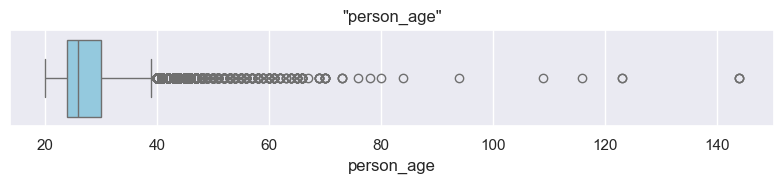

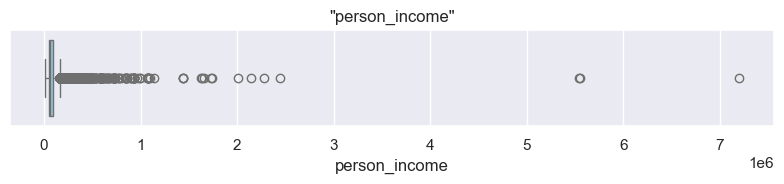

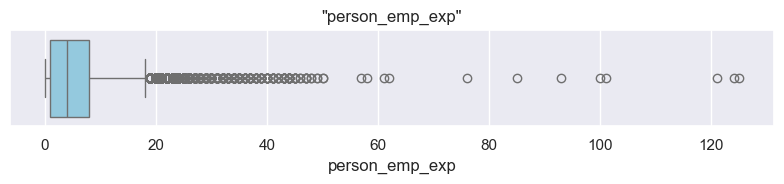

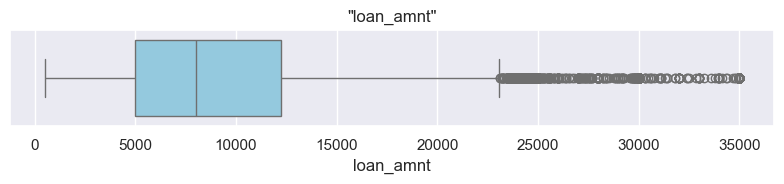

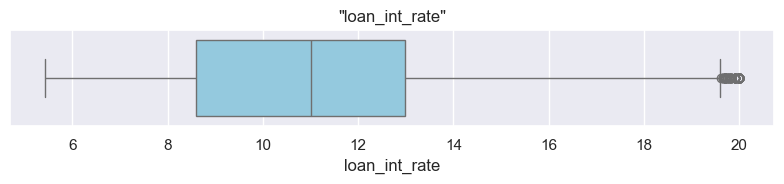

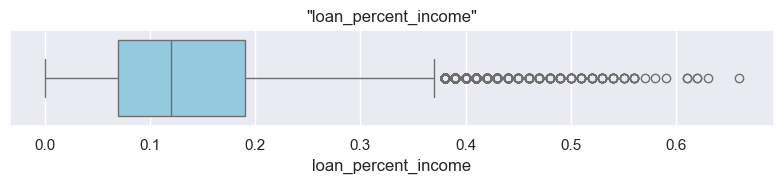

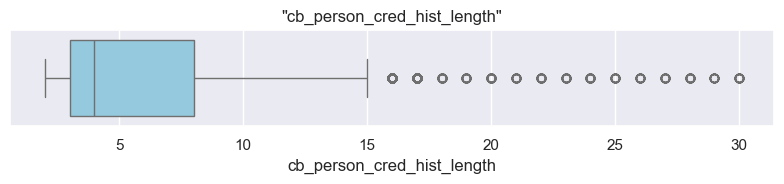

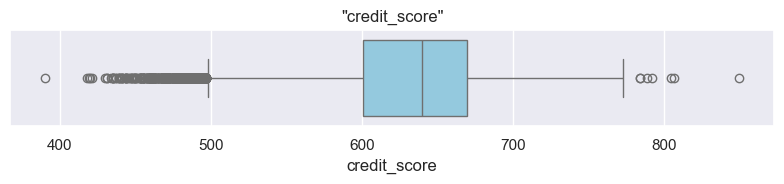

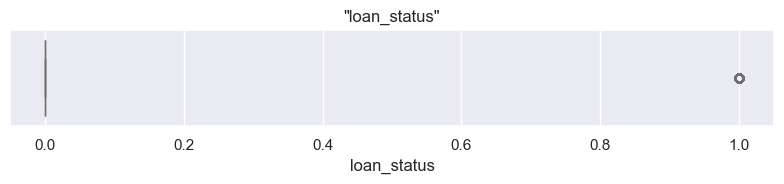

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols = x.select_dtypes(include='number').columns

for col in numeric_cols:
    plt.figure(figsize=(8, 2))
    sns.boxplot(x=x[col], color='skyblue', orient='h')
    plt.title(f'"{col}"', fontsize=12)
    plt.tight_layout()
    plt.show()


Выбросы есть в каждом столбце числовых данных. Удалим их во всех столбцах, кроме loan_status, так как он является бинарным

Для удаления выбросов мы использовали метод 1.5IQR, так как он лучше для выявления выбросов в данных, которые не распределены нормально. Он использует интерквартильный размах (IQR), который менее чувствителен к экстремальным значениям по сравнению с методом 3*STD, основанным на стандартном отклонении. 

In [50]:
df = x.copy()

numeric_cols = df.select_dtypes(include='number').columns
numeric_cols = numeric_cols.drop('loan_status')  

for i in numeric_cols:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    df = df[(df[i] >= lower) & (df[i] <= upper)]


In [51]:
df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
5,21.0,female,High School,12951.0,0,OWN,2500.0,VENTURE,7.14,0.19,2.0,532,No,1
9,21.0,female,High School,12739.0,0,OWN,1600.0,VENTURE,14.74,0.13,3.0,640,No,1
19,24.0,female,Master,14283.0,1,MORTGAGE,1750.0,EDUCATION,10.99,0.12,2.0,679,No,1
23,24.0,female,Bachelor,13866.0,0,OWN,1500.0,PERSONAL,7.29,0.11,3.0,600,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44990,31.0,male,Master,136832.0,9,RENT,12319.0,PERSONAL,16.92,0.09,7.0,722,No,1
44993,27.0,female,High School,35512.0,4,RENT,5000.0,PERSONAL,15.83,0.14,5.0,505,No,1
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1


После удаления выбросов в нашем датасете осталось 36065 строк. С этими данными мы и продолжаем работать.

## Описательные статистики

Числовые переменные:

In [19]:
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,35630.000000,35630.000000,35630.000000,35630.000000,35630.000000,35630.000000,35630.000000,35630.000000,35630.000000
mean,26.284592,70058.209234,3.951502,8278.957199,10.878978,0.129762,4.917036,631.965001,0.202161
std,3.719932,31552.390943,3.730713,4782.182916,2.927413,0.071594,2.547892,47.587105,0.401617
min,20.000000,8000.000000,0.000000,500.000000,5.420000,0.010000,2.000000,498.000000,0.000000
25%,23.000000,46443.250000,1.000000,4800.000000,8.490000,0.070000,3.000000,601.000000,0.000000
50%,25.000000,64820.000000,3.000000,7350.000000,11.010000,0.120000,4.000000,638.000000,0.000000
75%,29.000000,88575.000000,6.000000,11050.000000,12.907500,0.180000,7.000000,668.000000,0.000000
max,38.000000,166681.000000,15.000000,22400.000000,19.690000,0.320000,12.000000,762.000000,1.000000


Категориальные, номинальные переменные:

In [20]:
df.describe(include=['object', 'category'])

,person_gender,person_education,person_home_ownership,loan_intent,previous_loan_defaults_on_file
count,35630,35630,35630,35630,35630
unique,2,5,4,6,2
top,male,Bachelor,RENT,EDUCATION,Yes
freq,19514,11088,19314,7466,18647


## Визуализация

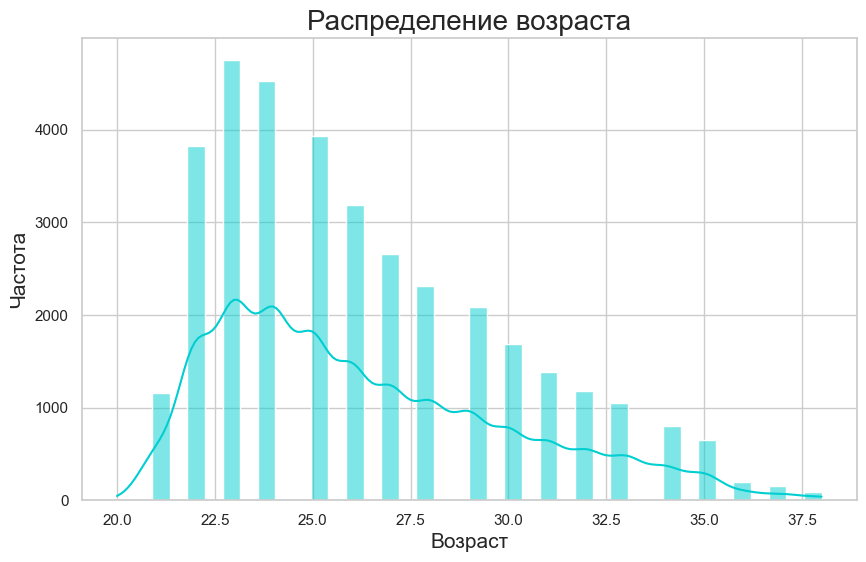

In [21]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(df['person_age'], bins=40, kde=True, color='darkturquoise')
plt.title('Распределение возраста', fontsize=20)
plt.xlabel('Возраст', fontsize=15)
plt.ylabel('Частота', fontsize=15)
plt.show()

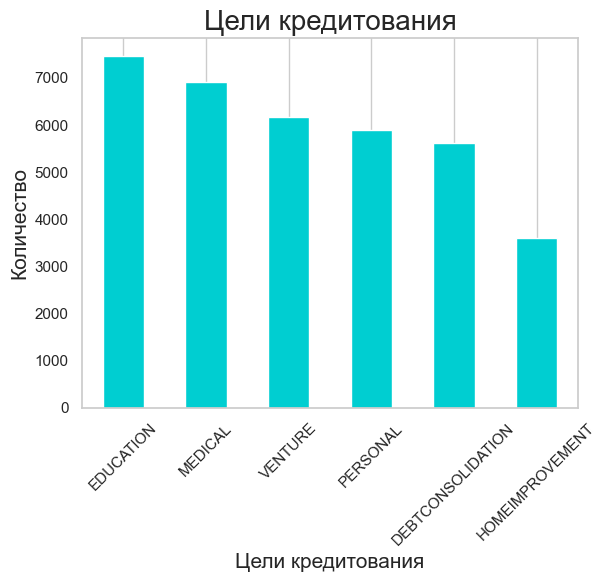

In [22]:
ax = df['loan_intent'].value_counts().plot(kind='bar', color='darkturquoise')
ax.set_xlabel('Цели кредитования', fontsize=15) 
ax.set_ylabel('Количество', fontsize=15)
ax.set_title("Цели кредитования", fontsize=20) 
ax.grid(axis='y')  
plt.xticks(rotation=45)  
plt.show()

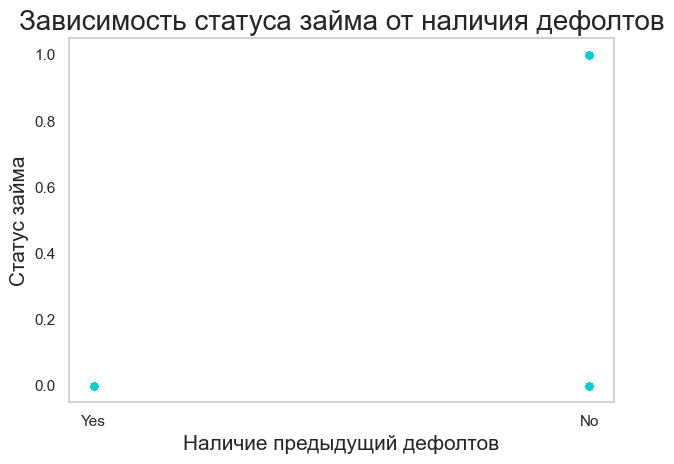

In [23]:

ax= df.plot('previous_loan_defaults_on_file', 'loan_status', kind = 'scatter', color='darkturquoise')

ax.set_xlabel('Наличие предыдущий дефолтов', fontsize=15)
ax.set_ylabel('Статус займа', fontsize=15)
ax.grid()
ax.set_title("Зависимость статуса займа от наличия дефолтов", fontsize=20)

plt.tight_layout()
plt.show()

Диаграмма рассеивания по данным наличия предыдущих дефолтов и одобрения кредита указывает на факт того, что всем, у кого имелись предыдущие дефолты по кредитам, не одобрили новый кредит. Это показывает, что фактор наличия предыдущих дефолтов является ключевым в одобрении кредита. 

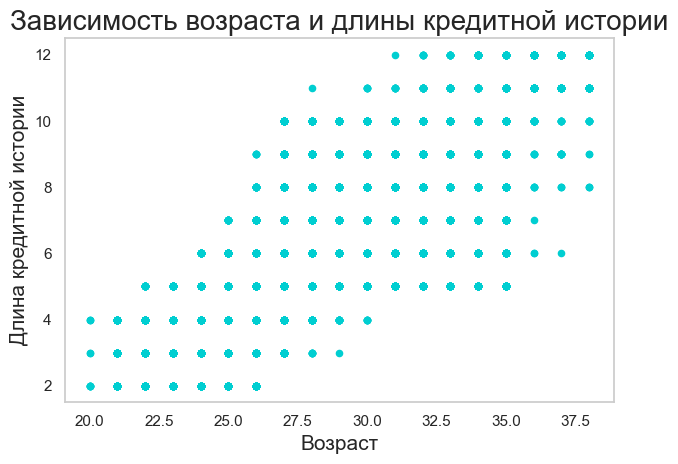

In [24]:
ax= df.plot('person_age', 'cb_person_cred_hist_length', kind = 'scatter', color='darkturquoise')
ax.set_xlabel('Возраст', fontsize=15)
ax.set_ylabel('Длина кредитной истории', fontsize=15)
ax.grid()
ax.set_title("Зависимость возраста и длины кредитной истории", fontsize=20)

plt.tight_layout()
plt.show()

На графике зависимости возраста и длины кредитной истории наблюдается высокая дисперсия, так как мы анализируем данные по более чем 35000 респондентов, что свидетельствует о большей репрезентативности выборки. 
Также можно утверждать что присутствует прямая корреляция между возрастом и кредитной историей, из чего следует, что почти все люди, данные по которым представленные в данных, берут кредиты начиная с раннего возраста. Малое количество выбросов подтверждает этот факт. 



***

## Корреляционный анализ

Перекодируем переменную 'previous_loan_defaults_on_file' (наличие предыдущих дефолтов по кредитам) в бинарную, чтобы можно было рассматривать корреляцию и с этим признаком:

In [25]:
df.loc[:, 'defaults'] = df['previous_loan_defaults_on_file'].map({'Yes': 1, 'No': 0})

C:\Users\masha\AppData\Local\Temp\ipykernel_41356\1309534333.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'defaults'] = df['previous_loan_defaults_on_file'].map({'Yes': 1, 'No': 0})


Построим корреляционную матрицу по числовым переменным используя корреляцию Пирсона (чтобы лучше уловить линейные зависимости в данных):


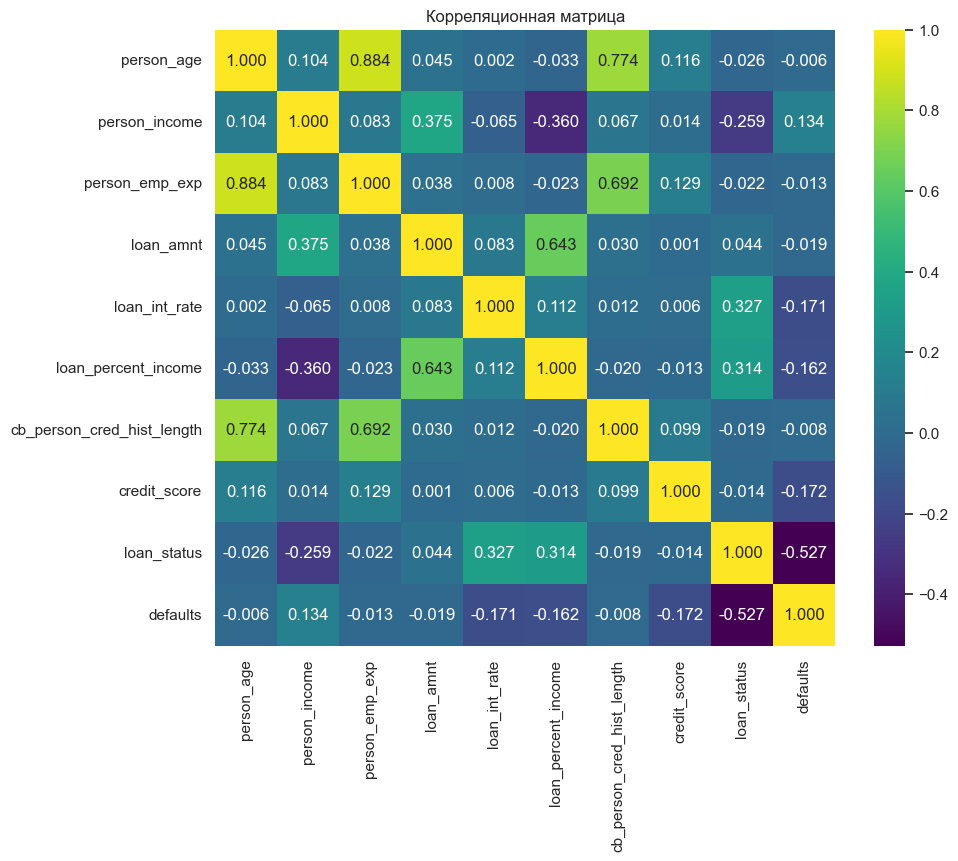

In [26]:
plt.figure(figsize=(10, 8))  
sns.heatmap(data=df.corr(numeric_only=True, method='pearson'), annot=True, fmt=".3f", cmap="viridis")
plt.title('Корреляционная матрица')
plt.show()

В ходе построения корреляционной матрицы мы выявили ее самое высокое значение между признаками “person_age” (возраст)  и “person_emp_exp” (стаж работы), равное 0.884

Но стоит помнить, что корреляция не доказывает причинно-следственную связь. Оно просто отражает взаимосвязь двух признаков в выборке.


Для визуализации этой зависимости построим диаграмму рассеяния по признакам “person_age”  и “person_emp_exp”:

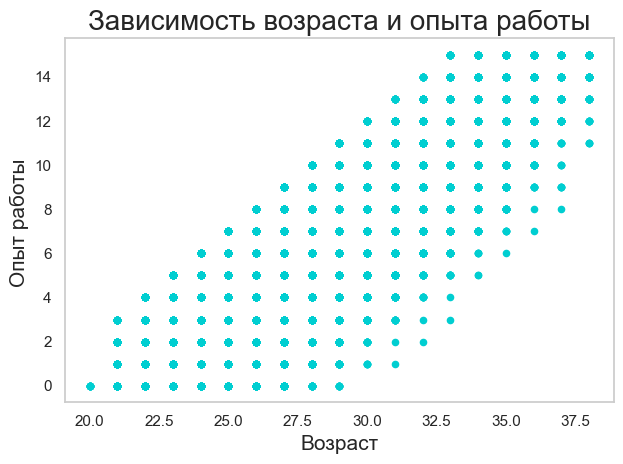

In [28]:
ax= df.plot('person_age', 'person_emp_exp', kind = 'scatter', color='darkturquoise')
ax.set_xlabel('Возраст', fontsize=15)
ax.set_ylabel('Опыт работы ', fontsize=15)
ax.grid()
ax.set_title("Зависимость возраста и опыта работы", fontsize=20)

plt.tight_layout()
plt.show()

Диаграмма рассеяния подтверждает высокую прямую корреляцию между этими признаками.


***

## Классификация

Целью данного исследования является предсказание признака "loan_status" (одобрен/не одобрен кредит). Так как это задача бинарной классификации, была выбрана логистическая регрессия для определения классов объектов. В отличие от линейной регрессии, которая может предсказывать значения за пределами диапазона от 0 до 1, логистическая регрессия ограничивает выходные данные функцией сигмоиды, что позволяет интерпретировать результаты как вероятности и идеально подходит для задач классификации.

Признак "loan_status" будет являться целевой переменной в регрессии. 

Для выявленя наиболее подходящих зависимых переменных рассмотрим еще раз корреляцию всех прзнаков с признаком "loan_status" в абсолютной величине

In [29]:
df.corr(numeric_only=True)["loan_status"].sort_values(key=abs, ascending=False).round(4)

loan_status                   1.0000
defaults                     -0.5275
loan_int_rate                 0.3272
loan_percent_income           0.3136
person_income                -0.2594
loan_amnt                     0.0441
person_age                   -0.0261
person_emp_exp               -0.0223
cb_person_cred_hist_length   -0.0190
credit_score                 -0.0137
Name: loan_status, dtype: float64

Выберем шесть переменных, с которыми целевая переменная имеет наибольшую корреляцию по модулю:
'defaults', 'loan_int_rate', 'loan_percent_income', 'person_income', 'loan_amnt', 'person_age'.

Посмотрим, как распределены данные. Для этого построим гистограммы по каждой переменной:


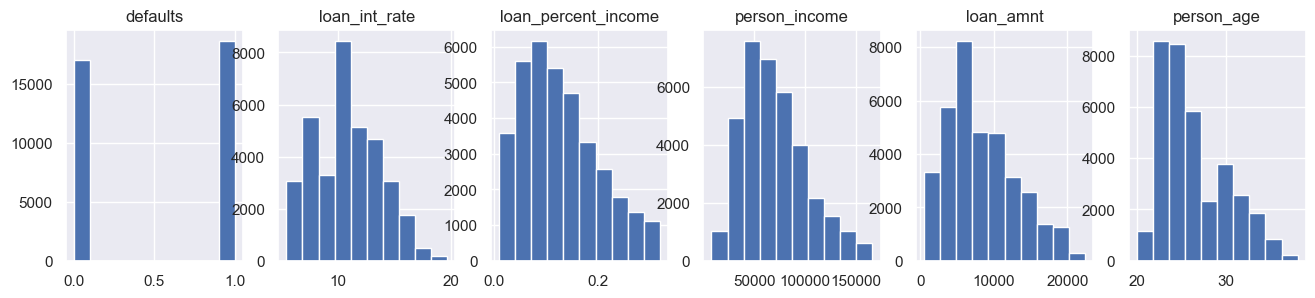

In [30]:
sns.set_style('darkgrid')
fig, ax = plt.subplots(1, 6, figsize=(16, 3))

lst = ['defaults', 'loan_int_rate', 'loan_percent_income', 'person_income', 'loan_amnt', 'person_age']

for i in range(len(lst)):
    ax[i].set_title(lst[i])
    ax[i].hist(df[lst[i]]);
    

Распределение всех числовых данных более-менее похоже на нормальное, значит преобразования (такие как логарифмирование) не обязательны. Более того, удаление выбросов и заполнение пустыхзначений уже было проделано на предыдущих этапах работы.

#### Построим модель логистической регрессии

#### Pазделим выборку на тестовую и тренировочную

In [31]:
from sklearn.model_selection import train_test_split

X = df[['defaults', 'loan_int_rate', 'loan_percent_income', 'person_income', 'loan_amnt', 'person_age']]
y = df['loan_status']
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state = 42)

#### Построим модель

In [52]:
from sklearn.linear_model import LogisticRegression
X_train1 = X_train[['defaults', 'loan_int_rate', 'loan_percent_income', 'person_income', 'loan_amnt', 'person_age']]
model1 = LogisticRegression(max_iter=1000).fit(X_train1, y_train)

#### Выводим коэффициенты модели

In [ ]:
coeffs = model1.coef_

feature_names = X_train1.columns  
for feature, coef in zip(feature_names, coeffs[0]):
    print(f"{feature}: {coef}")
print(f'intercept: {model1.intercept_.round(2)}')

defaults: -7.2713363044240795
loan_int_rate: 0.31633680604230024
loan_percent_income: 10.768535378844945
person_income: -1.281859750036446e-05
loan_amnt: -6.460966930366851e-05
person_age: -0.013176552834989995
intercept: [-3.85]


#### Запишем уравнение модели:


$$
\text{loan\_status} = -3.85 + (-7.27 \times \text{defaults}) + (0.32 \times \text{loan\_int\_rate}) + (10.77 \times \text{loan\_percent\_income}) + (-1.28 \times \text{person\_income}) + (-6.46 \times \text{loan\_amnt}) + (-0.013 \times \text{person\_age})
$$



#### Интерпретация коэффициентов:

- **Defaults**

    Коэффициент перед переменной defaults (дефолты по кредитам) равен -7.27.
    При увеличении дефолтов на 1 единицу, логарифм шансов того, что кредит будет одобрен, уменьшится на 7.27. Такое снижение довольно существенно, что логично, ведь любой банк стремится снизить свои риски и вероятность невозврата средств, а заемщики с историей невыполнения обязательств считаются менее благонадежными, что и приводит к отказу банками в выдаче кредита.

- **loan_int_rate**

    Коэффициент перед переменной loan_int_rate (ставка по кредиту) равен 0.32.
    При увеличении ставки по кредиту на 1%, логарифм шансов одобрения кредита вырастет на 0.32. Данное изменение с первого взгляда кажется парадоксальным, ведь высокая ставка ассоциируется с более рискованными кредитами, но его можно объяснить тем фактом, что в некоторых случаях банки готовы одобрять кредиты с высокой ставкой с расчетом на то, что она компенсирует возможные риски убытков.

- **loan_percent_income**

    Коэффициент перед переменной loan_percent_income (сумма кредита, как процент от годового дохода) равен 10.77.
    При увеличении процента дохода, который уходит на погашение кредита, на 1%, логарифм шансов одобрения кредита увеличится на 10.77. Такое сильное изменение, хотя и может показаться нелогичным с первого взгляда (ведь большая долговая нагрузка является фактором повышающим риски невыплаты кредита), может быть объяснено тем, что заемщики с высоким доходом берут много кредитов, тем самым отягчая свои доходы большими кредитными выплатами, но по-прежнему оставаясь платежеспособными, с помощью еще большего увеличения доходов дополнительными средствами, привлеченными кредитом.

- **person_income**

    Коэффициент перед переменной person_income (доход заемщика) равен -1.28.
    При увеличении дохода заемщика на 1 единицу, логарифм шансов одобрения кредита уменьшится на 1.28. Данное изменение очень мало и не может сильно повлиять на шанс одобрения, поэтому его нелогичность не так критична, хотя и может быть объяснена тем фактом, что банк предпочитает другие параметры больше, нежели этот.

- **loan_amnt**

    Коэффициент перед переменной loan_amnt (размер кредита) равен -6.46.
    При увеличении размера кредита на 1 единицу, логарифм шансов одобрения кредита уменьшится на 6.46. Интуитивно понятно, что больший размер кредита несет в себе риски больших убытков, поэтому банки будут менее склонны к их выдаче.

- **person_age**

    Коэффициент перед переменной person_age (возраст) равен -0.013.
    При увеличении возраста на 1 год, логарифм шансов одобрения кредита уменьшится на 0.013. Это значение настолько мало, что его изменение не израет существенной роли для модели.

- **Свободный коэффициент**

    В данной модели интерпретация свободного коэффициента попросту нецелесообразна, из-за невозможности равенства нулю таких параметров, как возраст (person_age), размер кредита (loan_amnt) и др.


#### Тестирование

#### Посчитаем значение Log-loss:

In [ ]:
from sklearn.metrics import log_loss
X_test1 = X_test[['defaults', 'loan_int_rate', 'loan_percent_income', 'person_income', 'loan_amnt', 'person_age']]
y_pred_proba1 = model1.predict_proba(X_test1)

loss = log_loss(y_test, y_pred_proba1)
print(f"Log Loss: {round(loss, 3)}")

Log Loss: 0.241


Log Loss = 0.241 близко к нулю и указывает на то, что модель достаточно хорошо справляется с задачей предсказания вероятностей для бинарной классификации. 

#### Построим матрицу ошибок

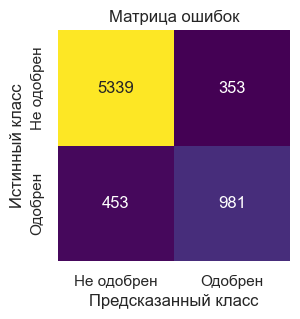

In [ ]:
y_pred1 = model1.predict(X_test1)

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred1)

plt.figure(figsize=(3, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', xticklabels=['Не одобрен', 'Одобрен'], yticklabels=['Не одобрен', 'Одобрен'], cbar=False)

plt.xlabel('Предсказанный класс')
plt.ylabel('Истинный класс')
plt.title('Матрица ошибок')

plt.show()

Высокое количество True Negatives (5339) и True Positives (981) говорит о том, что модель в целом достаточно хорошо классифицирует, когда кредит будет одобрен и когда нет.

Однако, модель все же ошибается, о чем свидетельстуют показатели False Positives (353) и False Negatives (453). 

In [ ]:
y_pred1 = model1.predict(X_test1)

#### Рассчитаем значение Accuracy

In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred1)

round(accuracy, 3)

0.887

#### Рассчитаем значение Precision

In [ ]:
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred1)

round(precision, 3)

0.735

#### Рассчитаем значение Recall

In [ ]:
from sklearn.metrics import recall_score

recall = recall_score(y_test, y_pred1)

round(recall, 3)

0.684

#### Рассчитаем значение F1

In [ ]:
from sklearn.metrics import f1_score

f1score = f1_score(y_test, y_pred1)

round(f1score, 3)

0.709

#### Выведем Classification Report

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93      5692
           1       0.74      0.68      0.71      1434

    accuracy                           0.89      7126
   macro avg       0.83      0.81      0.82      7126
weighted avg       0.88      0.89      0.89      7126



#### Интерпретация

1. Accuracy 0.89 означает, что модель правильно предсказала 89% случаев из всех данных, включая как одобренные, так и отклоненные кредиты.

2. Класс 0 (Кредит НЕ одобрен):
- Precision = 0.92 означает, что из всех предсказанных "не одобренных" кредитов, 92% действительно не были одобрены.
- Recall = 0.94 означает, что из всех фактических "не одобренных" кредитов, 94% были правильно предсказаны моделью.
- F1-score = 0.93 указывает на хороший баланс между точностью и полнотой.

3. Класс 1 (Кредит ОДОБРЕН):
- Precision = 0.74  означает, что из всех предсказанных "одобренных" кредитов, 74% действительно были одобрены.
- Recall = 0.68  означает, что из всех фактических "одобренных" кредитов, только 68% были правильно предсказаны моделью. 
- F1-score = 0.71: Модель работает хуже для этого класса по сравнению с классом 0. Это указывает на то, что модель имеет проблемы с правильным определением одобренных кредитов.

4. Достаточно высокие значения среднего по классам (Macro average) и среднего по весам классов (Weighted average) показывают, что модель хорошо сбалансирована и хорошо справляется с задачей, учитывая важность каждого класса.


#### Рассчитаем значение ROC-AUC

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

roc_auc = roc_auc_score(y_test, y_pred_proba1[:, 1])

round(roc_auc, 3)

np.float64(0.94)

Значение AUC = 0.94 близко к единице и говорит о том, что модель демонстрирует отличные результаты в задаче классификации.

#### Построим график ROC кривой

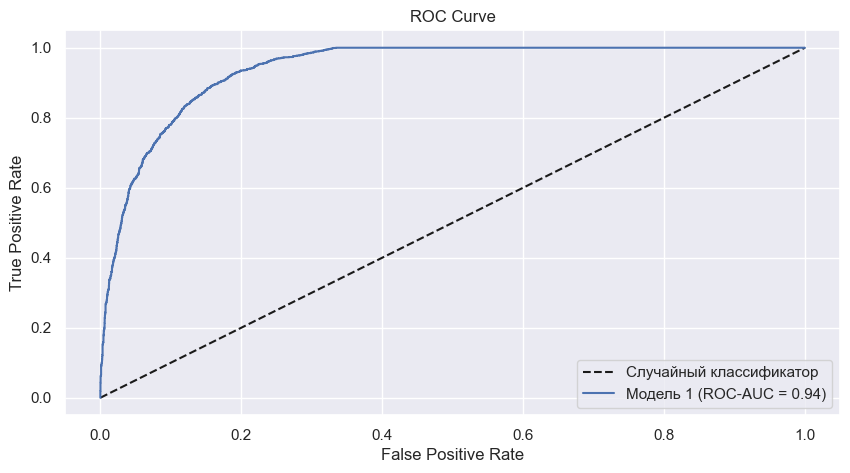

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (10, 5))

fpr1, tpr1, thresholds1 = roc_curve(y_test, y_pred_proba1[:, 1], pos_label=1) 


d = {1: [(fpr1, tpr1), roc_auc, 'b'],
     }

plt.plot([0, 1], [0, 1], 'k--',
         label='Cлучайный классификатор')
         
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

for k,v in d.items():
  plt.plot(v[0][0], v[0][1],
           label=f'Модель {k} (ROC-AUC = %0.2f)' % v[1])
plt.legend(loc="lower right")

По графику заметно, что ROC кривая близка к идеальной, и показывает результат значительно лучше случайного классификатора.

***

## Нелинейные модели машинного обучения
### Случайный лес

Случайный лес — это ансамблевый метод, который использует несколько деревьев решений для предсказания результата. Каждое дерево обучается на случайной выборке данных. Это позволяет эффективно моделировать сложные взаимодействия между признаками, такими как возраст клиента, размер кредита, предыдущие дефолты, доход и другие.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
X = df[['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 
        'loan_int_rate', 'loan_percent_income', 
        'cb_person_cred_hist_length', 'credit_score']]

y = df['loan_status']  

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n\n", classification_report(y_test, y_pred))


Accuracy: 0.8828234633735617
Classification Report:

               precision    recall  f1-score   support

           0       0.90      0.96      0.93      5692
           1       0.79      0.56      0.66      1434

    accuracy                           0.88      7126
   macro avg       0.85      0.76      0.79      7126
weighted avg       0.88      0.88      0.87      7126



#### Интерпретация

1. Accuracy (доля верных предсказаний) = 0.88, что означает, что модель правильно классифицирует примерно 88% всех заявок на кредит. 

2. Класс 0 (Кредит НЕ одобрен)
    - Precision = 0.90 означает, что из всех предсказаний о неодобрении кредита 90% действительно являются правильными.
    - Recall = 0.96 означает, что из всех реальных случаев неодобрения кредита 96% были правильно выявлены моделью.
    - F1-score = 0.93 указывает на высокий баланс точности и полноты, модель почти безошибочно определяет отклоненные кредиты.

3. Класс 1 (Кредит ОДОБРЕН)
    - Precision = 0.79 означает, что из всех предсказаний об одобрении кредита 79% действительно являются одобренными.
    - Recall = 0.56 означает, что из всех реальных случаев одобрения кредита модель смогла правильно определить только 56%.
    - F1-score = 0.66 обозначает средний баланс точности и полноты, что заметно хуже, чем для класса 0.

В итоге, модель хорошо определяет, когда кредит НЕ должен быть одобрен (класс 0), но часто ошибается с одобрением кредита.

### Улучшение модели случайного леса: 

In [ ]:
#1 попытка улучшить модель

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE


# Исползуем One-Hot Encoding, тк иначе категориальные данные читаются через раз 
df_encoded = pd.get_dummies(df, columns=['person_gender','person_education','person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file'])

X = df_encoded.drop(columns=["loan_status"])  
y = (df_encoded["loan_status"] > df_encoded["loan_status"].median()).astype(int)  


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# SMOTE (Synthetic Minority Over-sampling Technique) — метод синтетического увеличения выборки (oversampling) для балансировки классов в задаче классификации.
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Гиперпараметры для GridSearch
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [5, 15, None],
    'min_samples_split': [2, 5, 8],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ["balanced"]
}

# Автоматически подбираем лучшие гиперпараметры для RandomForestClassifier, оценивая их по Recall с кросс-валидацией. 
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring='recall', n_jobs=-1)
grid_search.fit(X_train_res, y_train_res)

# Лучшая модель после оптимизации
best_rf = grid_search.best_estimator_

# Обучаем Random Forest на сбалансированных данных
best_rf.fit(X_train_res, y_train_res)

y_probs = best_rf.predict_proba(X_test)[:, 1]  
y_pred_adjusted = (y_probs > 0.4).astype(int)  # Измененный порог


print(classification_report(y_test, y_pred_adjusted))


              precision    recall  f1-score   support

           0       0.99      0.72      0.84      5685
           1       0.47      0.98      0.64      1441

    accuracy                           0.77      7126
   macro avg       0.73      0.85      0.74      7126
weighted avg       0.89      0.77      0.80      7126



In [ ]:
#2 попыткаулучшить модель

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, f1_score
from imblearn.combine import SMOTETomek
from sklearn.preprocessing import LabelEncoder

df_encoded = pd.get_dummies(df, columns=['person_gender','person_education','person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file'])

X = df_encoded.drop(columns=["loan_status"])  
y = (df_encoded["loan_status"] > df_encoded["loan_status"].median()).astype(int)  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# Балансировка классов (SMOTE + Tomek Links для удаления выбросов: наряду с оверсэмплингом использовали андерсэмплинг)
smote_tomek = SMOTETomek(random_state=42)
X_train_res, y_train_res = smote_tomek.fit_resample(X_train, y_train)

# Оптимизация гиперпараметров (RandomizedSearchCV сначала, потом GridSearchCV - помогает быстро рандомным перебором найти хорошие параметры, а уже с помощью GridSearchCV донастроить их)
param_dist = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [5, 10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ["balanced_subsample"]
}

random_search = RandomizedSearchCV(RandomForestClassifier(random_state=42),
                                   param_distributions=param_dist,
                                   n_iter=10, cv=3, scoring='recall', n_jobs=-1, random_state=42)
random_search.fit(X_train_res, y_train_res)


best_rf = random_search.best_estimator_


best_rf.fit(X_train_res, y_train_res)


y_probs = best_rf.predict_proba(X_test)[:, 1]  

# Подбор оптимального порога вероятности для максимизации F1-score
thresholds = np.arange(0.1, 0.9, 0.05)
best_threshold = 0.5
best_f1 = 0
for t in thresholds:
    y_pred_temp = (y_probs > t).astype(int)
    f1 = f1_score(y_test, y_pred_temp)
    if f1 > best_f1:
        best_f1 = f1
        best_threshold = t

y_pred_adjusted = (y_probs > best_threshold).astype(int)


print(f"Оптимальный порог вероятностей: {best_threshold:.2f}")
print("ROC-AUC:", roc_auc_score(y_test, y_probs))
print("F1-score:", f1_score(y_test, y_pred_adjusted))
print("Classification Report:\n", classification_report(y_test, y_pred_adjusted))



Оптимальный порог вероятностей: 0.65
ROC-AUC: 0.9468930070916013
F1-score: 0.7221678093372511
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.91      0.92      5685
           1       0.68      0.77      0.72      1441

    accuracy                           0.88      7126
   macro avg       0.81      0.84      0.82      7126
weighted avg       0.89      0.88      0.88      7126



#### Интерпретация

1. Оптимальный порог вероятностей = 0.65, что значит, что кредиты считаются одобренными, если вероятность одобрения больше 65% (вместо стандартных 50%).

2. ROC-AUC = 0.9469 означает, что модель отлично различает одобренные и не одобренные кредиты.

3. F1-score = 0.72: Хороший баланс между precision и recall, модель стала точнее в предсказании одобрений.

4. Класс 0 (Кредит НЕ одобрен):
    - Precision = 0.94
    - Recall = 0.91
    - F1-score = 0.92: Модель почти безошибочно определяет отказы.

5. Класс 1 (Кредит ОДОБРЕН):
    - Precision = 0.68
    - Recall = 0.77
    - F1-score = 0.72: Хорошее качество предсказаний одобренных кредитов.

#### Что улучшилось по сравнению с базовой моделью?
F1-score для положительного класса вырос, значит модель лучше балансирует между precision и recall.
ROC-AUC = 0.94 показывает, что модель значительно лучше случайного угадывания.
Оптимизация порога вероятностей (0.65) снизила количество ошибок.

#### Сравнение с результатами линейной модели - логистической регрессии:

При первом построении сулчайного леса модель продемонстрировала более плохие результаты, однако после улучшения модель показала: 

- Precision для класса 0 увеличилась на 2% (с 92% до 94%).  
- Recall для класса 0 **уменьшилась** на 3% (с 94% до 91%).  
- F1-score для класса 0 уменьшился на 1% (с 93% до 92%).  
- Precision для класса 1 **уменьшилась** на 6% (с 74% до 68%).  
- Recall для класса 1 увеличилась на 9% (с 68% до 77%).  
- F1-score для класса 1 увеличился на 2% (с 70% до 72%).  
- Accuracy **уменьшилась** на 1% (с 89% до 88%).  
- Macro avg Precision **уменьшилась** на 2% (с 83% до 81%).  
- Macro avg Recall увеличилась на 3% (с 81% до 84%).  
- Macro avg F1-score не изменилась (осталась 82%).  
- Weighted avg Precision увеличилась на 1% (с 88% до 89%).  
- Weighted avg Recall **уменьшилась** на 1% (с 89% до 88%).  
- Weighted avg F1-score **уменьшилась** на 1% (с 89% до 88%).  
- ROC-AUC значение незначительно увеличилось до 0.9469.  

#### Вывод

Случайный лес заметно улучшил результаты по большинству метрик, особенно для класса 1 (одобренные кредиты), хотя и значение Precision снизилось. Хотя некоторые показатели ухудшились, модель стала более точной, улучшилась полнота и балансировка между точностью и полнотой, что делает ее более надежным инструментом для принятия решений по одобрению кредита.

## Градиентный бустинг

Градиентный бустинг в задаче предсказания одобрения кредита — это метод, который строит последовательность деревьев решений, где каждое следующее дерево исправляет ошибки предыдущих. Он обучается на данных о заемщиках (доход, возраст, кредитная история) и предсказывает вероятность одобрения кредита, минимизируя ошибки. Бустинг хорошо справляется с несбалансированными классами и сложными зависимостями, что делает его мощным инструментом для кредитного скоринга.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import classification_report, roc_auc_score, f1_score
from imblearn.combine import SMOTETomek
from xgboost import XGBClassifier

df_encoded = pd.get_dummies(df, columns=['person_gender','person_education','person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file'])

X = df_encoded.drop(columns=["loan_status"])  
y = (df_encoded["loan_status"] > df_encoded["loan_status"].median()).astype(int)  


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Балансировка классов (SMOTE + Tomek Links все также)
smote_tomek = SMOTETomek(random_state=42)
X_train_res, y_train_res = smote_tomek.fit_resample(X_train, y_train)

# Определение пространства гиперпараметров
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1, 0.2], # Скорость обучения управляет тем, на сколько сильно обновляется модель на каждом шаге. Низкие значения могут потребовать больше деревьев, но могут привести к более точной модели.
    'subsample': [0.7, 0.8, 0.9, 1.0], # Доля случайных образцов, которые будут использоваться для обучения каждого дерева.
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0], #Доля признаков (столбцов), которые будут использоваться для обучения каждого дерева.
    'gamma': [0, 0.1, 0.2, 0.3], # Этот параметр отвечает за степень регуляризации. Большее значение gamma заставляет модель искать более сложные разделения только в случае, если они существенно уменьшают ошибку.
    'scale_pos_weight': [1, 2, 3]  # Коррекция дисбаланса классов
}
# градиент бустинг
random_search = RandomizedSearchCV(XGBClassifier(random_state=42, eval_metric='logloss'),
                                   param_distributions=param_dist,
                                   n_iter=10, cv=3, scoring='recall', n_jobs=-1, random_state=42)
random_search.fit(X_train_res, y_train_res)


best_xgb = random_search.best_estimator_


best_xgb.fit(X_train_res, y_train_res)


y_probs = best_xgb.predict_proba(X_test)[:, 1]


thresholds = np.arange(0.1, 0.9, 0.05)
best_threshold = 0.5
best_f1 = 0

for t in thresholds:
    y_pred_temp = (y_probs > t).astype(int)
    f1 = f1_score(y_test, y_pred_temp)
    if f1 > best_f1:
        best_f1 = f1
        best_threshold = t

y_pred_adjusted = (y_probs > best_threshold).astype(int)

print(f"Оптимальный порог вероятностей: {best_threshold:.2f}")
print("ROC-AUC:", roc_auc_score(y_test, y_probs))
print("F1-score:", f1_score(y_test, y_pred_adjusted))
print("Classification Report:\n", classification_report(y_test, y_pred_adjusted))


Оптимальный порог вероятностей: 0.85
ROC-AUC: 0.9531888402036844
F1-score: 0.756578947368421
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.92      0.93      5685
           1       0.72      0.80      0.76      1441

    accuracy                           0.90      7126
   macro avg       0.83      0.86      0.85      7126
weighted avg       0.90      0.90      0.90      7126



#### Сравнение с результатами линейной модели - логистической регрессии:

- Precision для класса 0 увеличился на 3% (с 92% до 95%).  
- **Уменьшился** Recall для класса 0 на 2% (с 94% до 92%).  
- **Уменьшился** F1-score для класса 0 на 1% (с 93% до 92%).  
- **Уменьшился** Precision для класса 1 на 2% (с 74% до 72%).  
- Recall для класса 1 увеличился на 12% (с 68% до 80%).  
- F1-score для класса 1 увеличился на 5% (с 71% до 76%).  
- Accuracy увеличилась на 1% (с 89% до 90%).  
- Macro avg Precision увеличился на 1% (с 82% до 83%).  
- Macro avg Recall увеличился на 5% (с 81% до 86%).  
- Macro avg F1-score увеличился на 3% (с 82% до 85%).  
- Weighted avg Precision увеличился на 2% (с 88% до 90%).  
- Weighted avg Recall увеличился на 1% (с 89% до 90%).  
- Weighted avg F1-score увеличился на 1% (с 89% до 90%).  
- ROC-AUC увеличилась на 1% (с 0.94 до 0.95).  

#### Вывод

В общем и целом среди нелинейных моделей, проверенных нами - градиентный бустинг показывает высокую точность и сбалансированные результаты по всем метрикам. Эта модель показала в совокупности лучшие результаты, так что в задаче принятия решения об одобрении кредита мы отдаем предпочтение методу градиентного бустинга.

#### Итоги анализа линейной и нелинейных моделей

В задаче предсказания одобрения кредита нелинейные модели, такие как случайный лес и градиентный бустинг, справились лучше, чем линейная (логистическая регрессия), что мы выявили из ставнения метрик качества. Это свидетельствует о способности этих моделей более лучше улавливать сложные зависимости и взаимодействия между признаками.

#### Выделим основные преимущества нелинейных моделей перед линейными:

- Нелинейные модели (случайный лес и градиентный бустинг) могут улавливать сложные и взаимодействующие зависимости между признаками, что позволяет им более точно предсказывать результаты.

- Нелинейные модели учитывают особенности взаимодействия между признаками. Для примера, комбинация возраст и доход может по-разному влиять на вероятность одобрения кредита. Логистическая регрессия не способна уловить подобные особенности комбинаций признаков, что уменьшает ее точность.

- Логистическая регрессия предполагает линейную зависимость между признаками и предполагает, что данные как-либо определенно распределены. Нелинейные методы способны работать с более разнообразными типами данных и всевозможнми распределениями.

- Градиентный бустинг и случайный лес используют ансамблевые методы, которые комбинируют несколько моделей для получения предсказаний. Это повышает точность модели и ее способности к определению классов.

Таким образом, нелинейные модели могут более эффективно работать с сложными данными, что делает их более подходящими для задач бинарной классификации, таких как предсказание одобрения кредита.

***

# Тестировнаие гипотез

In [ ]:
import math

Для начала проверим нормальность распределения данных, с которыми собираемся работать.

Так как наблюдений в нашем датасете намного больше 5000 (а именно 36065), применять тест Шапиро-Уилка некорректно. Посмотрим на столбчатые диаграммы по каждому числовому признаку

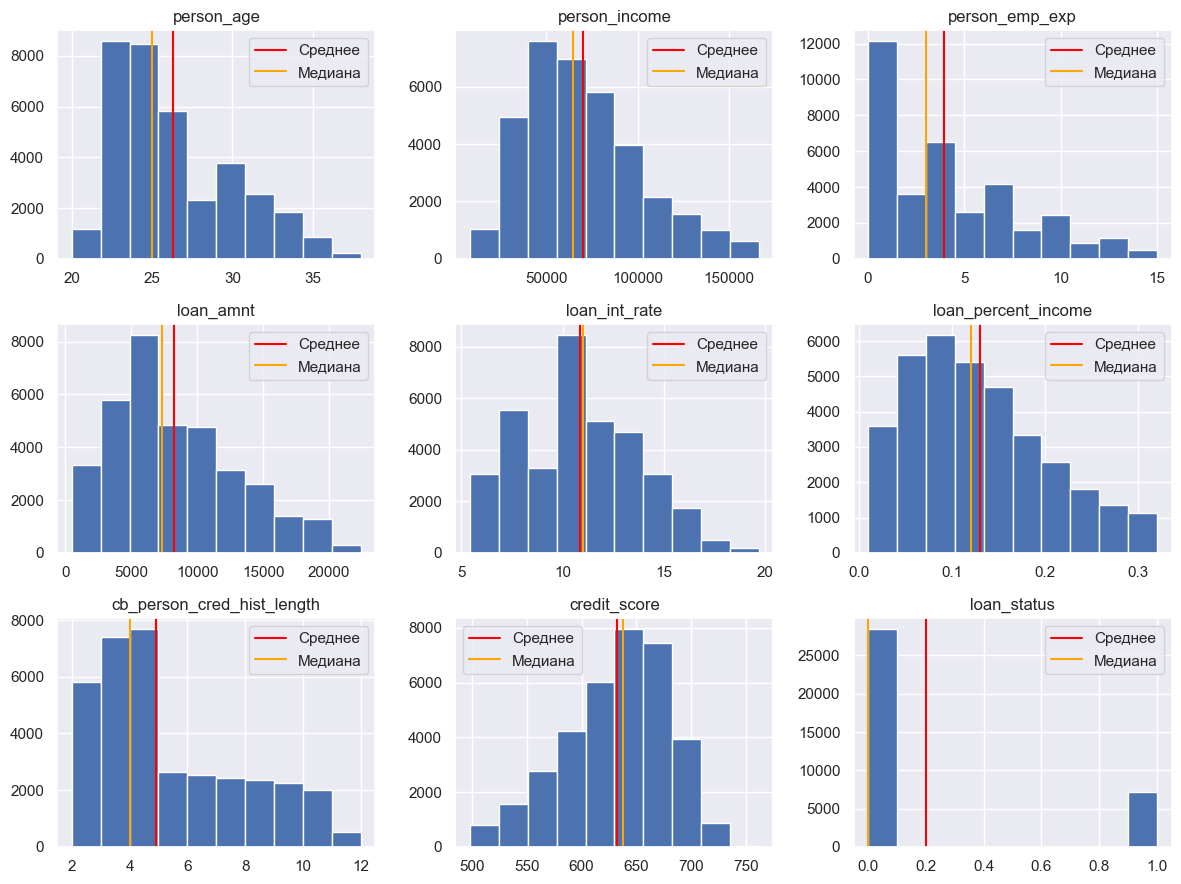

In [ ]:
sns.set_style('darkgrid')
fig, ax = plt.subplots(3, 3, figsize=(12, 9)) 

lst = df.select_dtypes(include=['number']).columns  
ax = ax.flatten()  

for i, col in enumerate(lst):  
    if i >= len(ax):   
        break  
    ax[i].set_title(col)
    ax[i].hist(df[col])
    ax[i].axvline(df[col].mean(), color='red', label='Среднее')
    ax[i].axvline(df[col].median(), color='orange', label='Медиана')
    ax[i].legend()

plt.tight_layout()  
plt.show()


Как можем заметить из распределений, все признаки, кроме "cb_person_cred_hist_length" (длина кредитной истории) и "person_emp_exp" (опыт работы в годах) распредлены более-менее нормально, поэтому мы продолжаем работать с этими признаками.

### Доверительный интервал для математического ожидания через z-статистику

Построим 99% доверительный интервал для среднего процента по кредиту

In [54]:
import scipy.stats as stats

mean = df['loan_int_rate'].mean()
std = df['loan_int_rate'].std()
n = 36065  # количество наблюдений
confidence_level = 0.99

res = stats.norm.interval(confidence_level,       # уровень надежности
                          loc=mean,               # среднее
                          scale=std/np.sqrt(n))
print(f'[{(round(res[0], 3))}, {(round(res[1], 3))}]')

[10.842, 10.921]


**Выводы:**

Это значит, что с вероятностью 99% истинный средний процент по кредиту для всей генеральной совокупности находится в интервале [10.842, 10.921].

По графику столбчатой диаграммы видно, что большинство значений этого признака сосредоточены возле моды и медианы, более того, наша выборка достаточно велика, поэтому доверительный интервал такой узкий.


### Доверительный интервал для математического ожидания через t-статистику

Построим 99% доверительный интервал для среднего значения длины кредитного рейтинга 

In [55]:
mean = df['credit_score'].mean()
std = df['credit_score'].std()
n = 36065 
gamma = 0.99

res = stats.t.interval(gamma,                # уровень надежности
                       df = n - 1,           # количество степеней свободы
                       loc = mean,           # среднее
                       scale = std/np.sqrt(n)) # 𝑠/√𝑛
print(f'[{(round(res[0], 3))}, {(round(res[1], 3))}]')

[631.456, 632.75]


**Вывод:**

 Данный результат свидетельствует о том, что с вероятностью в 99% истинный кредитный рейтинг  для всей генеральной совокупности находится в интервале [631.456, 632.75].


### Z-тест на математическое ожидание

**H0 (нулевая гипотеза)**: Средний размер запрашиваемого кредита равен 8220. 

**НА (альтернативная гипотеза)**: Средний размер запрашиваемого кредита не равен 8220.

Уровень значимости- 1%

Для проверки этой гипотезы проведем двусторонний Z-тест

In [ ]:
mu = 8220
std = df['loan_amnt'].std()

from statsmodels.stats.weightstats import ztest as ztest
res = ztest(df['loan_amnt'],                     
            value = mu,                 
            alternative = 'two-sided')   
print(f'Статистика: {(round(res[0], 3))}')
print(f'p-value: {(round(res[1], 3))}')

Статистика: 2.327
p-value: 0.02


**Выводы:**

Результаты Z-теста показали, что наблюдаемое отклонение среднего размера запрашиваемого кредита от 8220 составляет 2.327 стандартных отклонений. 

Значение p-value = 0.02 указывает на вероятность случайного появления такого отклонения в 2%, что больше выбранного уровня значимости 1% (α = 0.01).

Таким образом, мы не отвергаем нулевую гипотезу о том, что средний размер кредита равен 8220. То есть отклонение от предполагаемого значения не является статистически значимым на уровне 1%. 

### t-тест на математическое ожидание

**H0 (нулевая гипотеза)**: Cредний уровень заработка у людей, которые берут кредиты, равен 69750

**НА (альтернативная гипотеза)**: Cредний уровень заработка у людей, которые берут кредиты, неравен 69750

Уровень значимости- 5%

Для проверки этой гипотезы проведем двусторонний t-тест

In [ ]:
mu = 69750
std = df['person_income'].std()

res = stats.ttest_1samp(df['person_income'],                        
                        popmean=mu,                     
                        alternative='two-sided')       
print(f'Статистика: {(round(res[0], 3))}')
print(f'p-value: {(round(res[1], 3))}')

Статистика: 1.844
p-value: 0.065


**Вывод:**

В рамках нашего исследования результаты t-теста показали, что отклонение среднего уровня заработка от предполагаемого значения (69750) не является статистически значимым на уровне 5% (p-value = 0.065). 

Это означает, что в данной выборке нет достаточно убедительных доказательств того, что средний уровень заработка людей, берущих кредиты, отличается от 69750. Таким образом, нулевая гипотеза не отвергается.


### Тест на равенство математических ожиданий двух выборок

**H0 (нулевая гипотеза)**: Заемщики с высшим образованиемне не имеют более высокий кредитный рейтинг, чем заемщики с низким уровнем образования 

**НА (альтернативная гипотеза)**: Заемщики с высшим образованием имеют более высокий кредитный рейтинг, чем заемщики с низким уровнем образования 

Уровень значимости- 5%

Для этого объединим уровни обрадования: 'Master', 'Bachelor', 'Doctorate' - 'df_high'; 'High School', 'Associate' - 'df_low'

In [ ]:
df_high = df[df['person_education'].isin(['Master', 'Bachelor', 'Doctorate'])]['credit_score']
df_low = df[df['person_education'].isin(['High School', 'Associate'])]['credit_score']

In [ ]:
res = stats.ttest_ind(df_high,       # выборка 2
                         df_low,       # выборка 1
                         alternative = 'greater',     # >
                         equal_var=True)              # говорим, что дисперсии равны
print(f"P-value: {res[1]:.10f}")

P-value: 0.0000000000


**Выводы:**

p-value = 0, что меньшн любого стандартного уровня значимости. На основании теста мы отвергаем нулевую гипотезу в пользу альтернативной. Это означает, что заемщики с высшим образованием действительно имеют более высокий кредитный рейтинг, на основе наших данных. 

### С помощью критерия независимости хи квадрат проверим зависимость двух критериев в данных

**H0 (нулевая гипотеза)**: Между уровнем дохода и одобрением кредита нет зависимости

**НА (альтернативная гипотеза)**: Существует зависимость между уровнем дохода и одобрением кредита.

Уровень значимости- 5%

In [ ]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['person_income'], df['loan_status'])

chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"Статистика: {round(chi2_stat, 3)}")
print(f"p-value: {round(p_value, 5)}")


Статистика: 29495.355
p-value: 0.0


**Выводы:**

Результаты хи-квадрат теста показали, что хи-квадрат статистика равна 29495.355, а p-value = 0.0. Это указывает на то, что вероятность получения таких или более экстремальных значений, если нулевая гипотеза верна, стремится к нулю.

p-value = 0.0 указывает на очень сильную статистическую значимость. Это значение меньше любого адекватного уровня значимости, отклоняем нулевую гипотезу: существует зависимость между уровнем дохода и одобрением кредита.

Тогда справедливо сказать, что существует статистически значимая зависимость между уровнем дохода и вероятностью одобрения кредита. 

### С помощью критерия согласия хи квадрат проверим соответствие распределений двух признаков

**H0 (нулевая гипотеза)**: Между уровнем образования и целью кредита нет зависимости, то есть распределение цели кредита одинаково для разных уровней образования.

**НА (альтернативная гипотеза)**: Существует зависимость между уровнем образования и целью кредита, то есть распределение цели кредита отличается для людей с разным образованием.

Уровень значимости- 5%

In [ ]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['person_education'], df['loan_intent'])

chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"Статистика: {round(chi2_stat, 3)}")
print(f"p-значение: {round(p_value, 3)}")

Статистика: 45.174
p-значение: 0.001


**Выводы:**

p-value = 0.001 < alpha = 0.05 => Отклоняем нулевую гипотезу: существует зависимость между уровнем образования и целью кредита. 